<a href="https://colab.research.google.com/github/chaeyeon573/Sales-Analysis/blob/main/RFMipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pandas, Numpy, Matplotlib, Seaborn을 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns
import datetime as dt

# sales_data 변수를 만들고 sales_05.csv 값을 할당
sales_data = pd.read_csv('/content/sales_05_8.csv')

# sales_data의 head 값 확인하기
sales_data.head()

,Install,Time_stamp,Status,ID,Payment,Game_Name
0,2022-01-14,2022-01-27,purchase,Heidi_635,19900,Soccer Manager
1,2022-03-10,2022-03-13,purchase,Courtney_067,900,Mine Ground
2,2022-02-13,2022-02-19,purchase,David_737,9900,Soccer Manager
3,2022-02-07,2022-02-25,purchase,Lindsay_820,4900,Mine Ground
4,2022-03-06,2022-03-10,purchase,Jon_823,49900,Soccer Manager


In [ ]:
sales_data['Now'] = '2022-06-10'

sales_data['Now'] = pd.to_datetime(sales_data['Now'])

sales_data['Time_stamp'] = pd.to_datetime(sales_data['Time_stamp'])

sales_data = sales_data[sales_data['Status'] == 'purchase']

sales_data.info()

sales_data

<class 'pandas.core.frame.DataFrame'>
Index: 27682 entries, 0 to 27681
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Install     27682 non-null  object        
 1   Time_stamp  27682 non-null  datetime64[ns]
 2   Status      27682 non-null  object        
 3   ID          27682 non-null  object        
 4   Payment     27682 non-null  int64         
 5   Game_Name   27682 non-null  object        
 6   Now         27682 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 1.7+ MB


<ipython-input-4-46097306ccc9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['Now'] = '2022-06-10'
<ipython-input-4-46097306ccc9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['Now'] = pd.to_datetime(sales_data['Now'])
<ipython-input-4-46097306ccc9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

,Install,Time_stamp,Status,ID,Payment,Game_Name,Now
0,2022-01-14,2022-01-27,purchase,Heidi_635,19900,Soccer Manager,2022-06-10
1,2022-03-10,2022-03-13,purchase,Courtney_067,900,Mine Ground,2022-06-10
2,2022-02-13,2022-02-19,purchase,David_737,9900,Soccer Manager,2022-06-10
3,2022-02-07,2022-02-25,purchase,Lindsay_820,4900,Mine Ground,2022-06-10
4,2022-03-06,2022-03-10,purchase,Jon_823,49900,Soccer Manager,2022-06-10
...,...,...,...,...,...,...,...
27677,2022-05-11,2022-05-30,purchase,Debra_720,900,Mine Ground,2022-06-10
27678,2022-04-26,2022-04-28,purchase,Kevin_404,900,Soccer Manager,2022-06-10
27679,2022-03-30,2022-04-09,purchase,Roberto_426,9900,Mine Ground,2022-06-10
27680,2022-05-09,2022-05-27,purchase,Craig_278,4900,Mine Ground,2022-06-10


In [ ]:
# sales_data에 'Interval'열을 만들고 지금 시간에서 마지막 기록된 시간인 Time_stamp 값 빼기

sales_data['Interval'] = sales_data['Now']- sales_data['Time_stamp']
sales_data

,Install,Time_stamp,Status,ID,Payment,Game_Name,Now,Interval
0,2022-01-14,2022-01-27,purchase,Heidi_635,19900,Soccer Manager,2022-06-10,134 days
1,2022-03-10,2022-03-13,purchase,Courtney_067,900,Mine Ground,2022-06-10,89 days
2,2022-02-13,2022-02-19,purchase,David_737,9900,Soccer Manager,2022-06-10,111 days
3,2022-02-07,2022-02-25,purchase,Lindsay_820,4900,Mine Ground,2022-06-10,105 days
4,2022-03-06,2022-03-10,purchase,Jon_823,49900,Soccer Manager,2022-06-10,92 days
...,...,...,...,...,...,...,...,...
27677,2022-05-11,2022-05-30,purchase,Debra_720,900,Mine Ground,2022-06-10,11 days
27678,2022-04-26,2022-04-28,purchase,Kevin_404,900,Soccer Manager,2022-06-10,43 days
27679,2022-03-30,2022-04-09,purchase,Roberto_426,9900,Mine Ground,2022-06-10,62 days
27680,2022-05-09,2022-05-27,purchase,Craig_278,4900,Mine Ground,2022-06-10,14 days


In [ ]:
# RFM_data 변수를 만들고 Groupby()함수를 이용해서 Recency, Frequency, Monetary 집계하기


RFM_data = sales_data.groupby(sales_data['ID']).agg({'Interval': 'min', 'ID': 'count', 'Payment': 'sum'})
# RFM_data의 열 값을 각각 Recency, Frequency, Monetary로 변경

RFM_data.columns = ['Recency', 'Frequency', 'Monetary']
RFM_data

,Recency,Frequency,Monetary
ID,,,
Aaron_027,60 days,5,40500
Aaron_031,102 days,5,17500
Aaron_077,40 days,4,26600
Aaron_165,21 days,4,49600
Aaron_224,108 days,1,900
...,...,...,...
Zachary_937,101 days,4,11600
Zachary_948,48 days,5,26500
Zoe_163,11 days,5,105500


In [ ]:
RFM_data['Recency'] = pd.to_numeric(RFM_data['Recency'].dt.days)
RFM_data

,Recency,Frequency,Monetary
ID,,,
Aaron_027,60,5,40500
Aaron_031,102,5,17500
Aaron_077,40,4,26600
Aaron_165,21,4,49600
Aaron_224,108,1,900
...,...,...,...
Zachary_937,101,4,11600
Zachary_948,48,5,26500
Zoe_163,11,5,105500


In [ ]:
RFM_data.describe()

,Recency,Frequency,Monetary
count,5267.000000,5267.000000,5267.000000
mean,66.517752,5.255743,50340.003797
std,35.684775,6.995041,73012.364791
min,7.000000,1.000000,900.000000
25%,36.000000,1.000000,9900.000000
50%,61.000000,5.000000,29900.000000
75%,94.000000,5.000000,55500.000000
max,158.000000,37.000000,582700.000000


In [ ]:

RFM_data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Recency,5267.0,66.52,35.68,7.0,36.0,61.0,94.0,158.0
Frequency,5267.0,5.26,7.00,1.0,1.0,5.0,5.0,37.0
Monetary,5267.0,50340.00,73012.36,900.0,9900.0,29900.0,55500.0,582700.0


In [ ]:
# RFM_data의 Recency열 값을 내림차순(높은값에서 낮은 값 순서로)으로 정렬


RFM_data = RFM_data.sort_values('Recency', ascending=False)

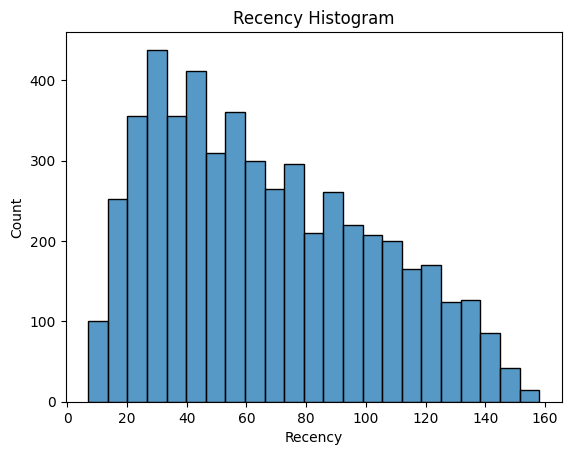

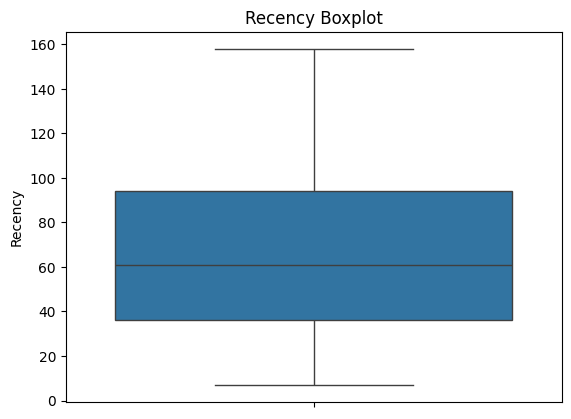

In [ ]:
#RFM_data의 Recency열 값을 히스토그램과 상자도표로 시각화해 봅시다.
ax = sns.histplot(data=RFM_data['Recency'])
plt.title('Recency Histogram')
plt.show()

ax = sns.boxplot(data=RFM_data['Recency'])
plt.title('Recency Boxplot')
plt.show()

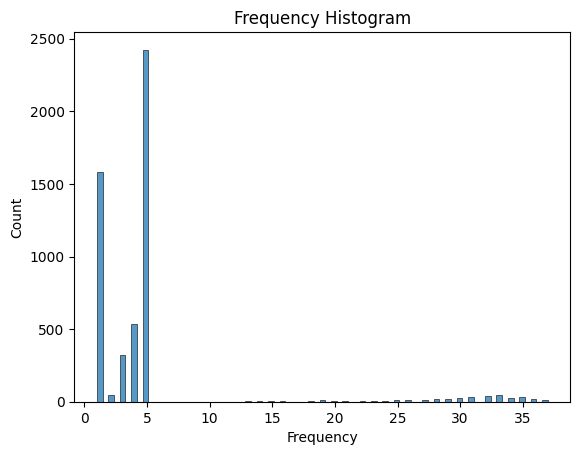

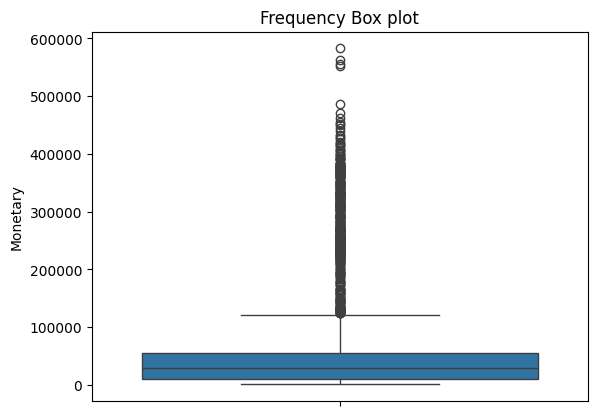

In [ ]:
frequency_data = RFM_data['Frequency'].sort_values(ascending = False)

monetay_data = RFM_data['Monetary'].sort_values(ascending = False)

ax = sns.histplot(data=frequency_data)
plt.title('Frequency Histogram')
plt.show()

sns.boxplot(data=monetay_data)
plt.title('Frequency Box plot')
plt.show()


In [ ]:
RFM_data['F_score'] = np.interp(RFM_data['Frequency'],(RFM_data['Frequency'].min(), RFM_data['Frequency'].max()), (1,100)).round(2)
RFM_data['R_score'] = np.interp(RFM_data['Recency'],(RFM_data['Recency'].max(), RFM_data['Recency'].min()), (1,100)).round(2)
RFM_data['M_score'] = np.interp(RFM_data['Monetary'],(RFM_data['Monetary'].min(), RFM_data['Monetary'].max()), (1,100)).round(2)



In [ ]:
RFM_data.sort_values(ascending = True, by = 'F_score')
#RFM_data에 Class열을 만들고, RFM_score 값을 지정한 분위값 범위에 따라 labels을 입력합니다. 예제에서는 전체의 40%를 5등급, 25%를 4등급, 20%를 3등급, 14%를 2등급, 1%를 1등급으로 구분하였습니다.
RFM_data["RFM_score"] = ((RFM_data['R_score'] + RFM_data['F_score'] + RFM_data['M_score'])/3).round(2)
RFM_data['Class'] = pd.quct(RFM_data['RFM_score'], q= [0.4,0.65,0.85,0.99,1], labesl = [5,4,3,2,1])

,Recency,Frequency,Monetary,F_score,R_score,M_score
ID,,,,,,
Nancy_218,158,1,900,1.0,100.0,1.00
Joshua_074,92,1,4900,1.0,100.0,1.68
Gilbert_559,41,1,4900,1.0,100.0,1.68
William_216,92,1,9900,1.0,100.0,2.53
Kristi_060,92,1,9900,1.0,100.0,2.53
...,...,...,...,...,...,...
Caleb_717,30,37,555300,100.0,100.0,95.34
Robert_522,25,37,306300,100.0,100.0,52.97
Joshua_761,31,37,402300,100.0,100.0,69.30


In [ ]:
# RFM_data에 RFM_score열을 만들고, 각 요소별 산술평균값을 할당
# 사용된 함수 round()는 결과 값의 소수 둘째자리까지 남겨두라는 의미입니다. 즉, 소수 셋째자리에서 반올림합니다.
RFM_data["RFM_score"] = ((RFM_data['R_score'] + RFM_data['F_score'] + RFM_data['M_score'])/3).round(2)
RFM_data["Class"] = pd.qcut(RFM_data['RFM_score'], q=[0, 0.4, 0.65, 0.85, 0.99, 1], labels=[5,4,3,2,1])

In [ ]:
# Class가 입력된 RFM_data의 인덱스를 재정렬합니다.
RFM_data = RFM_data.reset_index()
RFM_data

,index,ID,Recency,Frequency,Monetary,F_score,R_score,M_score,RFM_score,Class
0,0,Nancy_218,158,1,900,1.0,1.00,1.00,1.00,5
1,1,Michael_254,155,1,900,1.0,2.97,1.00,1.66,5
2,2,Craig_831,155,1,19900,1.0,2.97,4.23,2.73,5
3,3,Matthew_192,154,1,900,1.0,3.62,1.00,1.87,5
4,4,Greg_925,154,1,900,1.0,3.62,1.00,1.87,5
...,...,...,...,...,...,...,...,...,...,...
5262,5262,Leslie_007,7,5,70500,12.0,100.00,12.84,41.61,2
5263,5263,Jeffery_004,7,5,12500,12.0,100.00,2.97,38.32,2
5264,5264,Joshua_016,7,35,439500,94.5,100.00,75.63,90.04,1
5265,5265,Juan_957,7,5,62500,12.0,100.00,11.48,41.16,2


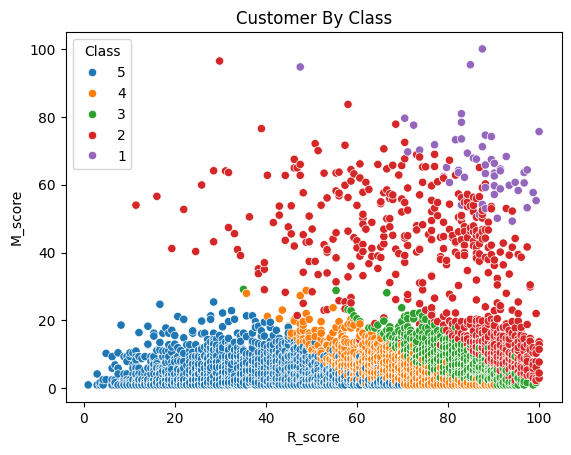

In [ ]:
sns.scatterplot(data=RFM_data, x='R_score', y='M_score', hue='Class')
plt.title('Customer By Class')
plt.show()

In [ ]:
# RFM_data의 ID값을 Class열을 기준으로 집계


temp_var = RFM_data['ID'].groupby(RFM_data['Class']).count()
temp_var

<ipython-input-117-88c533e045aa>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_var = RFM_data['ID'].groupby(RFM_data['Class']).count()


,ID
Class,
5,2109
4,1319
3,1049
2,737
1,53


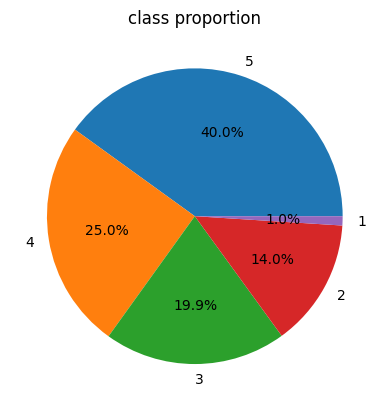

In [ ]:
plt.pie(temp_var, labels = temp_var.index,autopct = '%1.1f%%' )
plt.title("class proportion")
plt.show()



In [ ]:
# RFM_data의 Class를 기준으로 Recency, Frequency, Monetary의 평균값 집계
temp_var = RFM_data.groupby('Class').agg({'Recency': 'mean', 'Frequency':'mean', 'Monetary':'mean'}).round(1)
temp_var

temp_var.reset_index(drop = False, inplace = True)
temp_var


<ipython-input-120-ef7182c7cc07>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_var = RFM_data.groupby('Class').agg({'Recency': 'mean', 'Frequency':'mean', 'Monetary':'mean'}).round(1)


,Class,Recency,Frequency,Monetary
0,5,101.7,2.7,23367.4
1,4,55.0,3.6,32101.2
2,3,34.3,4.3,40620.6
3,2,35.1,15.0,150000.1
4,1,27.2,33.9,384081.1


In [ ]:
# 집계된 평균값 전치(Transpose)

temp_var = temp_var.T
temp_var

,ID
Class,
5,2109
4,1319
3,1049
2,737
1,53


In [ ]:
# temp_var.index = temp_var.index.tolist()
print(temp_var)


None


In [ ]:
# temp_var의 인덱스를 재정렬하고, 컬럼 이름을 Class로 변경합니다.
# temp_var = temp_var.reset_index()
# temp_var = temp_var.rename(columns = {'index':'Class'})

# temp_var = temp_var.drop(index = "Class")
# temp_var = temp_var.drop(index = "level_0")
temp_var = temp_var.drop(index = "index")
temp_var

,0,1,2
Class,,,
5,101.7,2.7,23367.4
4,55.0,3.6,32101.2
3,34.3,4.3,40620.6
2,35.1,15.0,150000.1
1,27.2,33.9,384081.1


In [ ]:
# 각 Class별 평균 Recency를 시각화합니다.

temp_var

ax = sns.barplot(data=temp_var, x='Class', y='Recency')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Recency By Class')
plt.show()

ValueError: Could not interpret value `Class` for `x`. Value is a string, but `data` was not passed.

# RFM_data의 R_score열을 만들고, Recency열 값을 기준으로 1부터 100까지의 실수로 정규화합니다.
RFM_data['R_score'] = np.interp(RFM_data['Recency'], (RFM_data['Recency'].min(), RFM_data['Recency'].max()), (100, 1)).round(2)

# 만들어진 RFM_data의 Head 값을 확인합니다.
RFM_data.head()